[lightGBM / XGBoost 파라미터 설명](http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()

In [ ]:
# X, y = iris.data, iris.target
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=30, n_informative=15, n_redundant=5, random_state=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [ ]:
# Use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy of DecisionTreeClassifier : %.5f"%accuracy)

Accuracy of DecisionTreeClassifier : 0.87100


In [ ]:
# Use AdaBoost Classifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier(random_state=1)
ab_clf.fit(X_train, y_train)
pred = ab_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy of AdaBoostClassifier : %.5f"%accuracy)

Accuracy of AdaBoostClassifier : 0.85850


In [ ]:
# Use GBM(Gadient Boost Machine)
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=1, loss="deviance", learning_rate=0.005, n_estimators=125)
gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy of GBM : %.5f"%accuracy)
print("Running time : %.2f"%(time.time() - start_time))

Accuracy of GBM : 0.82900
Running time : 9.51


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.05, 0.1, 0.2],
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.9min finished


{'learning_rate': 0.2, 'n_estimators': 500}
0.9484999999999999


In [ ]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy of GBM : %.5f"%accuracy)

Accuracy of GBM : 0.96700


### Use XGBoost, XGBClassifier

In [ ]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators=2000, learning_rate=0.05, max_depth=10)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=0)
pred = xgb_wrapper.predict(X_test)
proba = xgb_wrapper.predict_proba(X_test)
print(accuracy_score(y_test, pred))

0.974


### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=False)
pred = lgbm_wrapper.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9755


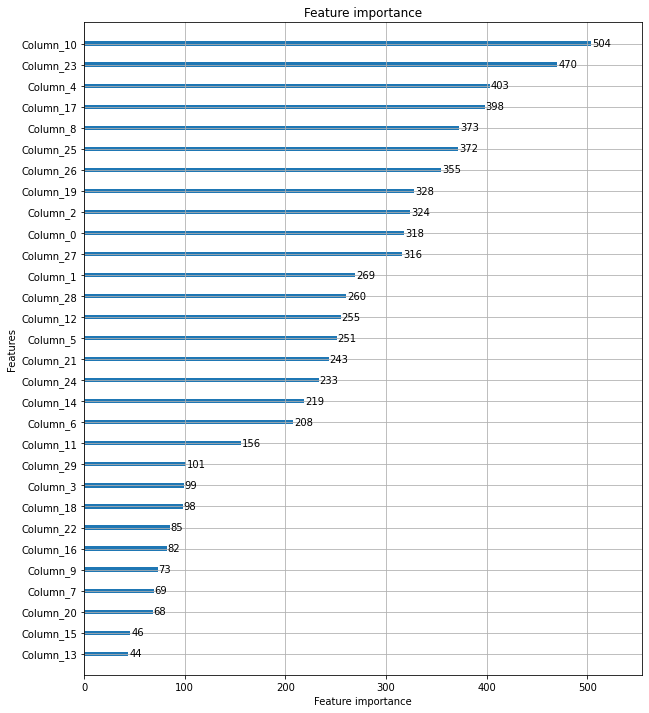

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

[matplotlib 완변 정리](https://hwi-doc.tistory.com/entry/matplotlib-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC)